# PHYS 101/121 Experiment 2 Analysis

In physics and in basic sciences and engineering, all the data analysis is done with computer. In order to do that you can use ready-made packages such as Microsoft Excel or Openoffice Calc; or you can consider to do it with a programming language where you can do alot of manipulations and use advanced techniques. We will use a very 'user-friendly', easy-to-learn programming language called Python. You can learn it by yourself with alot of resources on the net, it is quite easy. You can use links below. I will assume you have a basic familiarity with Python from now on. The platform we write our code is Jupyter Notebooks.

* (Turkish) Python Programlamaya Giriş - Veri Defteri http://www.veridefteri.com/2017/12/08/temel-python-programlama-ilk-adimlar/
* (English) Google Python Crash Course https://developers.google.com/edu/python/
* (English) Introduction to Python for Data Science https://www.datacamp.com/courses/intro-to-python-for-data-science
* (English) Various Courses in Coursera https://www.coursera.org/courses?languages=en&query=python

We will analyze the data that we take during our experiement. Our data logger records the values of the collection of position (x). The sampling rate of the data logger is 10 data/second, so it collects 10 data points every seconds. We will first write down our position data values to an array, then, we will calculate the avarage velocities (v_ave). Then we will plot the average velocity vs time graph. Lastly we will fit a linear equation to our graph and get the parameters which one of them is the acceleration we are after.

First, we start with importing numerical package of Python, called 'numpy' and graphing library matplotlib. They need to be called beforehand in order to use. We will assign shorthands to the names of the librarys 'np' and 'plt' just for convenience.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

We define our time interval starting with 0.5, increasing 1 by 1. Remember we will use the middle of the intervals (0.5, 1.5, 2.5 etc...) since we are calculating the avarage velocity correspoinding to those intervals. Avarage velocity is considered as the constant velecity in that interval and in that case it corresponds to the middle of that interval. We will use the np.arange() function in our case takes 3 parameters. First the starting value (inclusive), second the final value (not inclusive) and the third is the incremental size.

In [2]:
time = np.arange(0.5,11,1)

In [3]:
#Let's see our time array
time

array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
         9.5,  10.5])

Then we write down our data points into an array, which is called x.

In [4]:
x = [0.168, 0.178, 0.187, 0.200, 0.212, 0.226, 0.242, 0.260, 0.281, 0.299, 0.321, 0.345]

In order to calculate the avarage velocity we will need consecutive differecences of the positions. For instance:
* dx_1 = 17.8 -16.8 = 1.0
* dx_2 = 18.7 - 17.8 = 0.9 etc..

There is a built-in function in numpy which does this automatically for all the elements in the numpy which is callednp.ediff1d().

In [5]:
dx = np.ediff1d(x)
dx

array([ 0.01 ,  0.009,  0.013,  0.012,  0.014,  0.016,  0.018,  0.021,
        0.018,  0.022,  0.024])

We calculate the avarage velocity for each interval by dividing the differences by time interval (which is 0.1 seconds for all). By the way, if you divide a numpy array by a number, it divides all the elements one by one. There are many such great functionalities of numpy, you should really consider learning it.

In [6]:
v_ave = dx/0.1
v_ave

array([ 0.1 ,  0.09,  0.13,  0.12,  0.14,  0.16,  0.18,  0.21,  0.18,
        0.22,  0.24])

Let's plot our data. We will give labels to the axis and a name to our graph as well.

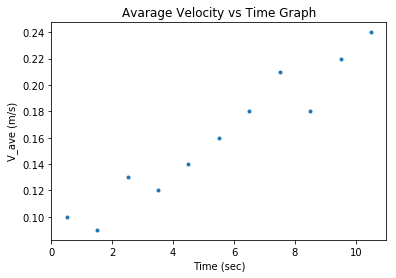

In [7]:
plt.plot(time, v_ave, '.')
plt.xlabel('Time (sec)')
plt.ylabel('V_ave (m/s)')
plt.title('Avarage Velocity vs Time Graph')
plt.show() 

In order to fit a linear model ($y = mx + n$) to our data, we will use another Numpy method, np.polyfit. For this method we provide our x and y values and the degree which is 1 (linear). The output of the method gives two parameters, the slope and the intercept. The slope is the acceleration.

In [8]:
m, n = np.polyfit(time, v_ave, 1)

In [9]:
print('acceleration is: ', round(m,3))
print('intercept is : ', round(n,3))

acceleration is:  0.014
intercept is :  0.081


At the end, we draw our model and data in the same plot. For this we create another time points which are more densely seperated and apply our model parameters in order to get $y = mt + n$.

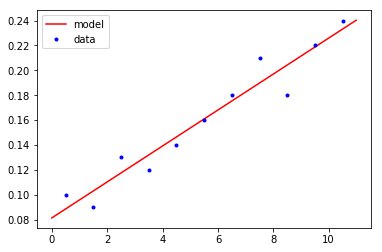

In [11]:
time_new = np.arange(0,11,0.01)
model = m*time_new + n
plt.plot(time_new, model,'r', label = 'model')
plt.plot(time, v_ave, 'b.', label = 'data')
plt.legend()
plt.show()